<a href="https://colab.research.google.com/github/PD7-debug/Assignment-Mod-1/blob/main/Regression_Metrics_Assignment_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.What does R-squared represent in a regression model
R-squared indicates the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1.

###2. What are the assumptions of linear regression
- Linearity
- Independence of errors
- Homoscedasticity
- Normality of residuals
- No multicollinearity

###3. What is the difference between R-squared and Adjusted R-squared
Adjusted R-squared adjusts the R-squared value based on the number of predictors, penalizing excessive variables that don’t improve the model.

###4. Why do we use Mean Squared Error (MSE)
MSE measures the average of the squares of the errors. It penalizes larger errors more and is useful for optimization.

### 5.What does an Adjusted R-squared value of 0.85 indicate
It means 85% of the variability in the dependent variable is explained by the model, adjusted for the number of predictors used.

###6. How do we check for normality of residuals in linear regression
By using histograms, Q-Q plots, or statistical tests like Shapiro-Wilk or Kolmogorov-Smirnov.

###7. What is multicollinearity, and how does it impact regression
Multicollinearity occurs when independent variables are highly correlated. It can inflate standard errors and make coefficients unreliable.

###8. What is Mean Absolute Error (MAE)
MAE is the average of the absolute differences between predicted and actual values. It treats all errors equally.

###9. What are the benefits of using an ML pipeline
Pipelines streamline the workflow, reduce errors, and allow consistent preprocessing, training, and evaluation.

###10. Why is RMSE considered more interpretable than MSE
RMSE has the same units as the dependent variable, making it easier to understand than MSE.

### 11.What is pickling in Python, and how is it useful in ML
Pickling serializes Python objects to a file. It's used to save trained models for future use.

###12. What does a high R-squared value mean
A high R-squared means that the model explains a large portion of the variance in the target variable.

###13. What happens if linear regression assumptions are violated
Violations can lead to biased estimates, unreliable predictions, and incorrect conclusions.

###14. How can we address multicollinearity in regression
- Remove correlated predictors
- Use dimensionality reduction (e.g., PCA)
- Apply regularization (Ridge/Lasso)

###15. How can feature selection improve model performance in regression analysis
It reduces overfitting, improves model interpretability, and may enhance predictive accuracy.

###16. How is Adjusted R-squared calculated
Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)], where p = number of predictors, n = observations.

### 17.Why is MSE sensitive to outliers
MSE squares the error terms, so large errors (outliers) have a disproportionately high impact.

###18. What is the role of homoscedasticity in linear regression
Homoscedasticity ensures that residuals have constant variance. If violated, it affects the reliability of coefficient estimates.

###19. What is Root Mean Squared Error (RMSE)
RMSE is the square root of the average squared differences between predicted and observed values.

###20. Why is pickling considered risky
Pickling can execute arbitrary code, which may be a security risk when loading files from untrusted sources.

###21. What alternatives exist to pickling for saving ML models
- `joblib`
- `ONNX`
- `PMML`
- Exporting via frameworks like TensorFlow SavedModel

###22. What is heteroscedasticity, and why is it a problem
Heteroscedasticity refers to unequal variance in residuals. It violates regression assumptions and leads to inefficient estimates.

###23. How can interaction terms enhance a regression model's predictive power?
They capture the combined effect of two or more variables, allowing the model to detect more complex relationships.

### Practical Q1. Write a Python program to generate synthetic regression data using sklearn's make_regression.

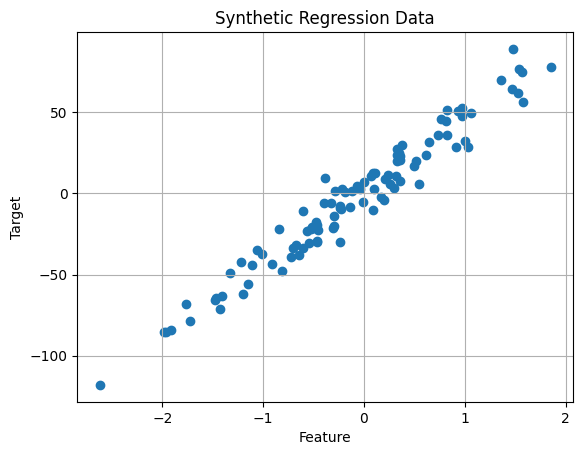

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
plt.scatter(X, y)
plt.title("Synthetic Regression Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid()
plt.show()

### Practical Q2. Perform simple linear regression using sklearn on synthetic data.

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [44.43716999]
Intercept: 1.1651153205269726


### Practical Q3. Visualize the fitted linear regression line with matplotlib.

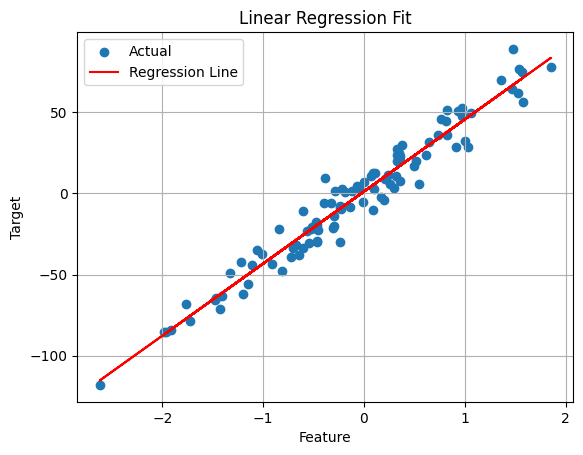

In [3]:
y_pred = model.predict(X)
plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.legend()
plt.title("Linear Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid()
plt.show()

### Practical Q4. Calculate R-squared, MAE, MSE, and RMSE for the model.

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.9538252459635717
MAE: 7.104493131413916
MSE: 78.054250421239
RMSE: 8.834831657775887


### Practical Q5. Split the data into train and test sets, then fit a model and evaluate performance.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Test RMSE: 10.207949183448665


### Practical Q6. Perform polynomial regression using sklearn's PolynomialFeatures.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))

Polynomial Regression RMSE: 10.268139842544361


### Practical Q7. Visualize polynomial regression curve with test data.

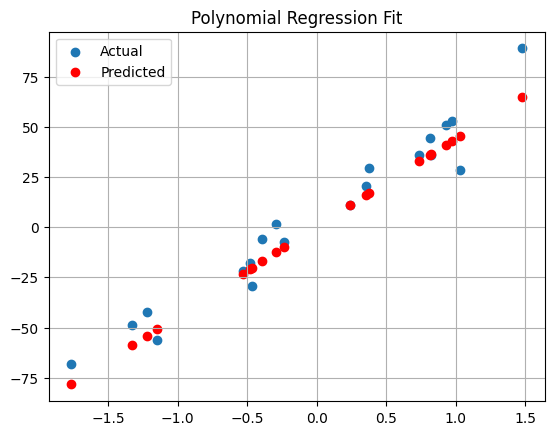

In [15]:
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_poly_pred, color="red", label="Predicted")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.grid()
plt.show()

### Practical Q8. Use LabelEncoder and OneHotEncoder to handle categorical data.

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Value": [1, 2, 3, 4, 5]
})

label_encoder = LabelEncoder()
data["Color_Label"] = label_encoder.fit_transform(data["Color"])

onehot = OneHotEncoder(sparse=False)
encoded = onehot.fit_transform(data[["Color_Label"]])
print(encoded)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

### Practical Q9. Use sklearn Pipeline for regression including preprocessing.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pipe_pred = pipeline.predict(X_test)
print("Pipeline RMSE:", np.sqrt(mean_squared_error(y_test, y_pipe_pred)))

Pipeline RMSE: 10.20794918344866


### Practical Q10. Calculate VIF (Variance Inflation Factor) to detect multicollinearity.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Simulate some multicollinear data
X_mc = np.random.rand(100, 3)
X_mc[:, 2] = X_mc[:, 0] + X_mc[:, 1]  # create collinearity

df = pd.DataFrame(X_mc, columns=["X1", "X2", "X3"])
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

  Feature  VIF
0      X1  inf
1      X2  inf
2      X3  inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Practical Q11. Save and load a model using pickle.

In [20]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Loaded model coefficients:", loaded_model.coef_)

Loaded model coefficients: [44.24418216]


### Practical Q12. Save and load a model using joblib.

In [21]:
import joblib

joblib.dump(model, "model_joblib.pkl")
loaded_joblib_model = joblib.load("model_joblib.pkl")

print("Joblib model coefficients:", loaded_joblib_model.coef_)

Joblib model coefficients: [44.24418216]


### Practical Q13. Compare MAE, MSE, RMSE between linear and polynomial regression.

In [22]:
def evaluate_model(y_true, y_pred, label):
    print(f"{label} -> MAE: {mean_absolute_error(y_true, y_pred):.2f}, "
          f"MSE: {mean_squared_error(y_true, y_pred):.2f}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

evaluate_model(y_test, y_test_pred, "Linear")
evaluate_model(y_test, y_poly_pred, "Polynomial")

Linear -> MAE: 8.42, MSE: 104.20, RMSE: 10.21
Polynomial -> MAE: 8.41, MSE: 105.43, RMSE: 10.27


### Practical Q14. Use cross_val_score to evaluate regression model using cross-validation.

In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print("Cross-validated RMSE:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

Cross-validated RMSE: [10.11477258  9.21993924 10.78991527  7.63902385  6.66790317]
Mean RMSE: 8.886310822657979


### Practical Q15. Plot residuals of a regression model to assess performance.

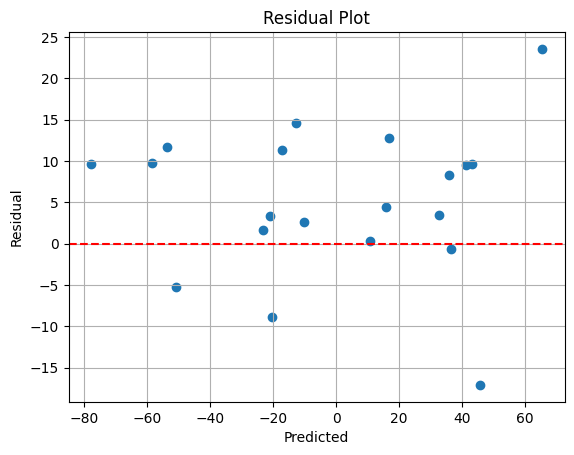

In [24]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.grid()
plt.show()

### Practical Q16. Use sklearn's metrics to print full regression evaluation report.

In [25]:
from sklearn.metrics import mean_absolute_percentage_error

print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))

MAE: 8.416659922209051
MSE: 104.20222653187027
RMSE: 10.207949183448665
MAPE: 0.7039070815763073


### Practical Q17. Perform ridge regression on synthetic data and report performance.

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_ridge_pred)))

Ridge RMSE: 10.285234214219978


### Practical Q18. Perform lasso regression on synthetic data and report performance.

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)

print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_lasso_pred)))

Lasso RMSE: 10.219531239614039


### Practical Q19. Compare linear, ridge, and lasso regression performance.

In [28]:
evaluate_model(y_test, y_test_pred, "Linear")
evaluate_model(y_test, y_ridge_pred, "Ridge")
evaluate_model(y_test, y_lasso_pred, "Lasso")

Linear -> MAE: 8.42, MSE: 104.20, RMSE: 10.21
Ridge -> MAE: 8.45, MSE: 105.79, RMSE: 10.29
Lasso -> MAE: 8.42, MSE: 104.44, RMSE: 10.22


### Practical Q20. Demonstrate overfitting by comparing training vs testing error in polynomial regression.

In [29]:
y_poly_train = poly_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_poly_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_poly_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 8.532504627901188
Test RMSE: 10.268139842544361


### Practical Q21. Plot predicted vs actual values for regression model.

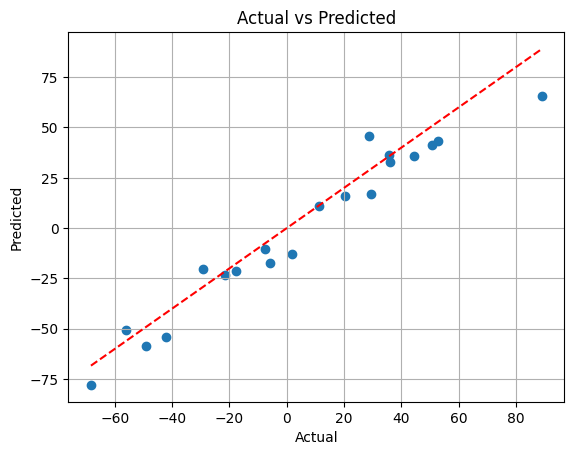

In [30]:
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()

### Practical Q22. Use statsmodels to fit an OLS regression and get detailed summary.

In [31]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2024.
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           2.96e-67
Time:                        13:01:10   Log-Likelihood:                -359.76
No. Observations:                 100   AIC:                             723.5
Df Residuals:                      98   BIC:                             728.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1651      0.898      1.297      0.1

### Practical Q23. Visualize regression coefficients using bar plot.

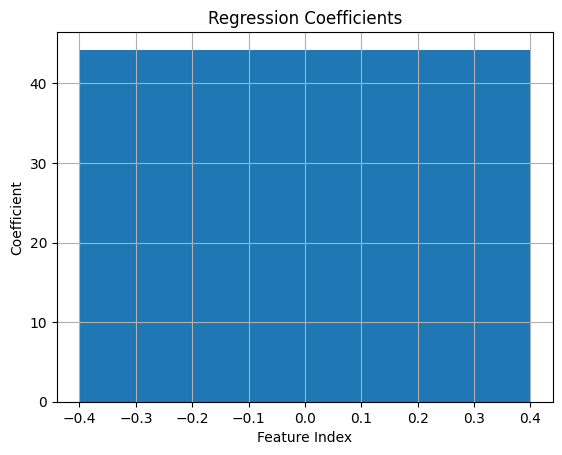

In [32]:
coefs = model.coef_.flatten()
plt.bar(range(len(coefs)), coefs)
plt.title("Regression Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.grid()
plt.show()

### Practical Q24. Perform polynomial regression of degree 3 and compare with degree 2.

In [33]:
poly3_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_model.fit(X_train, y_train)
y_poly3_pred = poly3_model.predict(X_test)

print("Poly Degree 3 RMSE:", np.sqrt(mean_squared_error(y_test, y_poly3_pred)))

Poly Degree 3 RMSE: 10.275718089935458


### Practical Q25. Demonstrate inverse relationship between bias and variance in linear vs polynomial models.

In [34]:
print("Linear Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Poly Degree 3 Test RMSE:", np.sqrt(mean_squared_error(y_test, y_poly3_pred)))

Linear Test RMSE: 10.207949183448665
Poly Degree 3 Test RMSE: 10.275718089935458
